## Dataset downloaded from NOAA breakdown

### Importing necessary libraries and function

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from dataset_loader_function import load_weather_dataset, load_cleaned_dataset

In [2]:
df_weather_noaa_dataset = load_weather_dataset()

In [3]:
df_california_weather_dataset = load_cleaned_dataset()

e:\githubProjects\Ahmed_Manzim_Ridwan_APF_Project_WiSe_2024_25\scripts\dataset_loader_function.py:10: DtypeWarning: Columns (12,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('../dataset/dataset_cleaned.csv')


### Dataset cleansaning

#### Convert DATE to datetime format

In [4]:
df_weather_noaa_dataset["DATE"] = pd.to_datetime(df_weather_noaa_dataset["DATE"])

#### Extract year and month for trend analysis:

In [5]:
df_weather_noaa_dataset["year"] = df_weather_noaa_dataset["DATE"].dt.year
df_weather_noaa_dataset["month"] = df_weather_noaa_dataset["DATE"].dt.month

#### aggregate fire and temp separately

In [6]:
df_california_weather_dataset.head(1)

,object_id,damage,street_number,street_name,street_type,street_suffix,city,state,zip_code,cal_fire_unit,...,fire_name_secondary,apn,assessed_value,year_built,site_address,global_id,latitude,longitude,x_coordinate,y_coordinate
0,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0101090290,510000.0,1970-01-01 00:00:00.000001997,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.47496,-122.044465,-1.358593e+07,4646740.75


In [7]:
df_california_weather_dataset['incident_start_date'] = pd.to_datetime(df_california_weather_dataset['incident_start_date'], errors='coerce')

df_california_weather_dataset["year"] = df_california_weather_dataset["incident_start_date"].dt.year
df_california_weather_dataset["month"] = df_california_weather_dataset["incident_start_date"].dt.month

## Temperature trend for each month since 2016 based on NOAA data

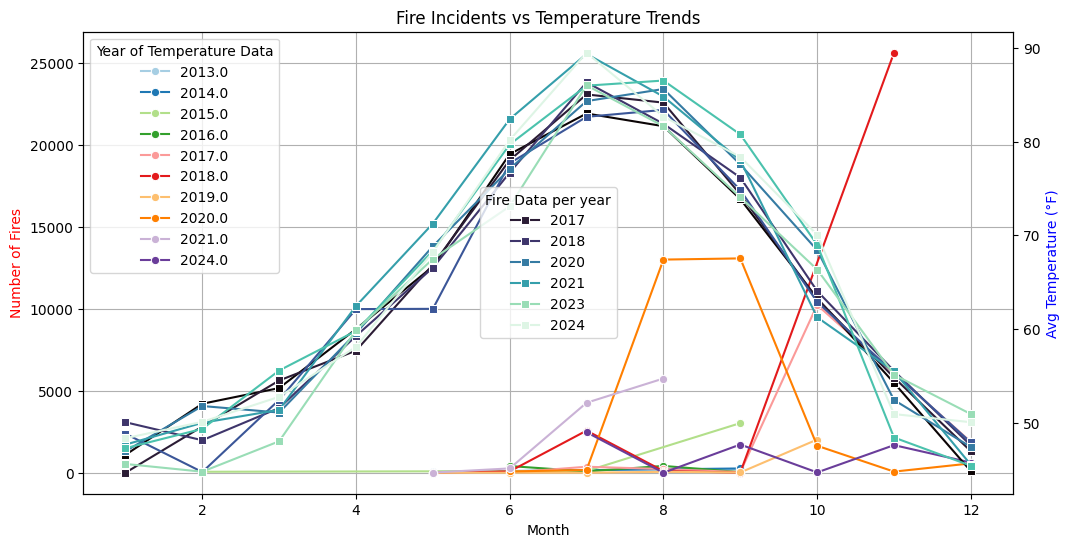

In [8]:
# fire count per month
fires_per_month = df_california_weather_dataset.groupby(['year', 'month']).size().reset_index(name='fire_count')

# average temperature per month
temp_per_month = df_weather_noaa_dataset.groupby(['year', 'month'])['TAVG'].mean().reset_index()

# plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# prepare x axis
sns.lineplot(
    x="month", 
    y="fire_count", 
    hue="year", 
    marker="o", 
    data=fires_per_month, 
    ax=ax1,
    palette="Paired"
)
ax1.set_ylabel("Number of Fires", color="red")
ax1.set_xlabel("Month")
ax1.set_title("Fire Incidents vs Temperature Trends")
ax1.grid(True)

# prepare y axis
ax2 = ax1.twinx()
sns.lineplot(
    x="month", 
    y="TAVG", 
    hue="year", 
    marker="s", 
    data=temp_per_month, 
    ax=ax2, 
    palette="mako"
)
ax2.set_ylabel("Avg Temperature (°F)", color="blue")

# legend naming
ax2.legend(title="Fire Data per year", loc="center")
ax1.legend(title="Year of Temperature Data", loc="upper left")

plt.show()


<center> <h4><b><span>End of this file's coding.</span></b></h4> </center>